In [1]:
from vpython import *
import matplotlib.pyplot as plt
import copy

<IPython.core.display.Javascript object>

In [2]:
# calculates gravitational force of two objects
G = 6.674e-11       # gravitational constant
scale = 1e3         # scale up the size of planet bc it's hard to see

# Planet Radius (in m)
r_sun = 695700000
r_mercury = 2440000
r_venus = 6.05184e6
r_earth = 6.378e6
r_mars = 3.38992e6

# Planet Mass (in kg)
m_sun = 1.989e30
m_mercury = 3.302e23
m_venus = 48.685e23
m_earth = 5.97219e24
m_mars = 6.4173e23

def gforce(obj1, obj2):

    r_vec = obj1.pos - obj2.pos                           # distance vector
    r_hat = r_vec / mag(r_vec)                            # vector for direction of force
    F_mag = (G * obj1.mass * obj2.mass) / (mag(r_vec)**2)   # compute magnitude of grav force. Use mag(d_vec) to get "length of distance vector"
    
    # NOTE: vector = combination of magnitude & direction
    # To get Force in vector form, combine mampugnitude(F_mag) and direction(d_hat) where direction=unit vector
    # Negative because it's a gravity (has an attractive property)
    F_vec = r_hat * -F_mag
    return F_vec                                      # returns Force in vector form

## a. Newton's Cannonball

In [3]:
# Canvas
scene = canvas()
scene.range = 10e6
scene.userzoom=True
scene.autoscale=False

###################
launch_v_x = 7070        # Change this to test different velocity of the cannonball
###################

# Global Variables
m_ball = 1            # mass of the ball (kg)
t = 0                 # time
dt = 1                # change in time

# Gravitational force getting applied to the ball from the start
v_y = -(G * m_earth * m_ball) / r_earth **2

# VPython Objects
ball = sphere(pos=vector(0,1.25,0)*r_earth, radius=r_earth/20, color=color.red, mass=m_ball, make_trail=True, 
              p=vector(launch_v_x, v_y, 0)*m_ball, interval=10)   # p = mass * velocity. Initial momentum given as one of the properties of ball.
pole = box(pos=vector(0,1.1,0)*r_earth, size=vector(0.05, 0.2, 0)*r_earth, color=color.yellow)
earth = sphere(pos=vector(0,0,0), radius=r_earth, texture=textures.earth, mass=m_earth, shiness=0)

ball.velocity = vector(launch_v_x, 0, 0)

# SIMULATION
while mag(ball.pos) > r_earth:  # Runs until the ball hits the surface of the earth
    rate(1000)
    
    ball.force = gforce(ball, earth)              # force in vector form
    ball.p = ball.p + ball.force*dt               # impulse adds up bc it's change in momentum. impulse = force * change in time
    ball.pos = ball.pos + (ball.p/ball.mass)*dt   # impulse = m * velocity. So impulse / m = v, v * delta t = position
    t = t + dt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

***Assumption***:   
- Assume that there's no resistance applying to the cannonball. 
- Assume that the only forces that are being applied to the cannonball are gravity and the launch velocity.  
- Assume that the earth is a perfect sphere.  
- Assume that the cannonball shoots from the height of 1.25 * Earth's radius (for better visibility).  
- Assume that the cannonball is 1kg. 

To implement the simulation, I decided to use **Euler-Cromer method**.  
Therefore, I'm going to use momentum as part of the implementation.  
I added the momentum property to the ball for ease of access.  
I initialized it using by multiplying the mass of the ball with the initial velocity given to the ball.  

*<ins>To find gravitational force between two objects:</ins>*   
First, I made a unit vector of distance.  
$$ \hat{d} = \frac{\vec{d}}{|\vec{d}|}  $$
Then, I found the gravitational force between two objects using a distance vector (by using magnitude). This force is in magnitude form.  
$$ F = \frac{GM_1M_2}{|\vec{d}|^2} $$
Now, we can put things back together to form a force in a vector form by multiplying force in magnitude form with the unit vector.  
I've put negative in the front because it has an attractive property (gravitational force).  
$$ \vec{F} = -F * \hat{d} $$
Then I used this for future calculations.   

Impulse is a change in momentum. I decided to use impulse because it can be used to replace the velocity. Below is an impulse equation of the cannonball.
$$ I = \Delta{p} = F * \Delta{t} = m * \Delta{v} $$
Since I've assumed that the Earth is not moving, the equation can be rewritten as  
$$ I = p = F * \Delta{t} = m * v $$
where p is the momentum and v is the velocity of the cannonball orbiting around the Earth.  
The position of the cannonball can now be found using the equation below.
$$ position = position + velocity * \Delta{t} $$
By using impulse, the equation can be modified.
$$ position = position + \frac{p}{m}*\Delta{t} $$
Since we already impulse and the mass of the cannonball, the new position can easily be calculated now.  
  
***Verification***:   
The simulation can be verified by using the orbital velocity formula, the speed of which an object travels while orbiting around another attractive object.  
$$ v_o = \sqrt {\frac {GM}{r}} $$
In our case, r is going to be 1.25 x Earth's radius because of where the cannonball gets launched. M is the mass of the Earth. According to the equation, v_o turns out to be 7,070 m/s. If you begin the simulation using the launch velocity of 7,070 m/s, you can clearly see that the cannonball orbits around the Earth. From this, now we know for sure that our simulation is accurate. 
  
For the escape velocity, you can use the equation below.  
$$ v_e = \sqrt {\frac {2GM}{r}} $$
According to this equation, v_e turns out to be ~11179 m/s. If you run the simulation with a launch velocity of v_e, you can see that the cannonball does not orbit around the Earth anymore.  

***Reference***:  
https://en.wikipedia.org/wiki/Unit_vector  
https://www.physicstutorials.org/impulse-momentum/impulse/  
https://www.youtube.com/watch?v=4ycpvtIio-o

## b. Solar System

In [8]:
###################################################
# Number of Days to Test
# Starting from Jan 1st 2024, test the next 30 days (so until Jan 31th 2024)
num_days = 30
###################################################

# Canvas
scene = canvas()
scene.autoscale=True

# Global Variables
t = 0                 # time
dt = 60               # change in time (60sec = 1min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
# 86400 = 1 day in seconds. Multiplied by num_days for next 30 days
while t <= 86400*num_days:
    rate(1/dt * 1000000)        
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos))
        venus_pos.append(copy.deepcopy(venus.pos))
        earth_pos.append(copy.deepcopy(earth.pos))
        mars_pos.append(copy.deepcopy(mars.pos))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

# List out the result of the simulation
print("---- Mercury Positions ----")
for idx, i in enumerate(mercury_pos):
    print("Day {0}: Position(x,y,z)={1}".format(idx, i))

print("---- Venus Positions ----")
for idx, i in enumerate(venus_pos):
    print("Day {0}: Position(x,y,z)={1}".format(idx, i))
    
print("---- Earth Positions ----")
for idx, i in enumerate(earth_pos):
    print("Day {0}: Position(x,y,z)={1}".format(idx, i))

print("---- Mars Positions ----")
for idx, i in enumerate(mars_pos):
    print("Day {0}: Position(x,y,z)={1}".format(idx, i))

<IPython.core.display.Javascript object>

---- Mercury Positions ----
Day 0: Position(x,y,z)=<-4.10841e+10, 2.99738e+10, 6.21789e+09>
Day 1: Position(x,y,z)=<-4.42711e+10, 2.66428e+10, 6.238e+09>
Day 2: Position(x,y,z)=<-4.71472e+10, 2.31245e+10, 6.21429e+09>
Day 3: Position(x,y,z)=<-4.97075e+10, 1.9451e+10, 6.14894e+09>
Day 4: Position(x,y,z)=<-5.19506e+10, 1.56532e+10, 6.04432e+09>
Day 5: Position(x,y,z)=<-5.38774e+10, 1.17599e+10, 5.90289e+09>
Day 6: Position(x,y,z)=<-5.54915e+10, 7.79806e+09, 5.72717e+09>
Day 7: Position(x,y,z)=<-5.6798e+10, 3.79285e+09, 5.5197e+09>
Day 8: Position(x,y,z)=<-5.78037e+10, -2.32606e+08, 5.28298e+09>
Day 9: Position(x,y,z)=<-5.85166e+10, -4.25703e+09, 5.01949e+09>
Day 10: Position(x,y,z)=<-5.89456e+10, -8.26094e+09, 4.73164e+09>
Day 11: Position(x,y,z)=<-5.91002e+10, -1.22265e+10, 4.42175e+09>
Day 12: Position(x,y,z)=<-5.89906e+10, -1.61376e+10, 4.09208e+09>
Day 13: Position(x,y,z)=<-5.86272e+10, -1.99793e+10, 3.74479e+09>
Day 14: Position(x,y,z)=<-5.80206e+10, -2.37382e+10, 3.38197e+09>
Day 1

***Reference***:  
https://en.wikipedia.org/wiki/Unit_vector  
https://ssd.jpl.nasa.gov/horizons/app.html#/  
https://www.physicstutorials.org/impulse-momentum/impulse/  
https://www.youtube.com/watch?v=4ycpvtIio-o  
https://www.glowscript.org/#/user/PHYS172x/folder/MyPrograms/program/Solar-System-Planets/edit for planet textures

## c. Discuss My Decision

<ins>Initial Value</ins>
- Assumed that simulation is based on the position & velocity of all the planets on January 1st, 2024 for ease of testing. By doing so, it can easily be tested by comparing the vector table created for planets between Jan 1st, 2024 ~ the number of days the simulation is running from the NASA website.
- Used an actual mass and radius of all planets given from the NASA website where mass is in a unit of kg, radius and position are in a unit of m, and velocity is in a unit of m/s.
- A variable called num_days is created to store the number of days the simulation is going to run. Since the simulation only runs for 30 days, its value is set to 30. If the simulation needs to run for more/less than 30 days, this variable can be easily modified at any time.  
- The size of the planet has been scaled up for ease of visibility.  

<ins>Model Parameter</ins>
- num_days variable created to specify the number of days the simulation will run.
  
<ins>Simulation Time</ins>
- dt(delta t) is set to 60 because we want to run 1 min for each dt. Each t is equivalent to 1 sec, and it increments by 60 which is equivalent to 1 minute.  
- Rate is set to 1/60 * 1000000 to constantly update the canvas.  
- Decided to check when time % 86400 because since t is in a unit of a second, 60 * 60 * 24 is 86400 (1 day in a unit of second) is when we know that 1 day has passed. 

## d. Discuss My Approach

- I decided to store all the planets in a list so that I could iterate through them during the simulation and calculate the gravitational force coming from different planets. Then, I made 2 for-loops where the first for-loop chooses the planet that we're interested in, and the other for-loop calculates all the gravitational forces coming from different planets. Using the summed-up force, I was able to calculate the momentum and the next position of the planet.  
- I also created a list of each planet's position over time to later plot them.  
- To calculate the velocity and the position of each planet, I used the same technique as I did for Newton's cannonball implementation (Euler-Cromer Method).  
- I decided to use meters as a unit for the position of the planets in 3-dimensional space and their radius because it is easier to handle values that are in meters and I've already set my G (Gravitational Constant) to be in Nm^2/kg^2.

***Reference***:  
https://ssd.jpl.nasa.gov/horizons/app.html#/  


## e. Discuss Verification

To generate the plot for solar years, I decided to make another simulation that runs 365 days.

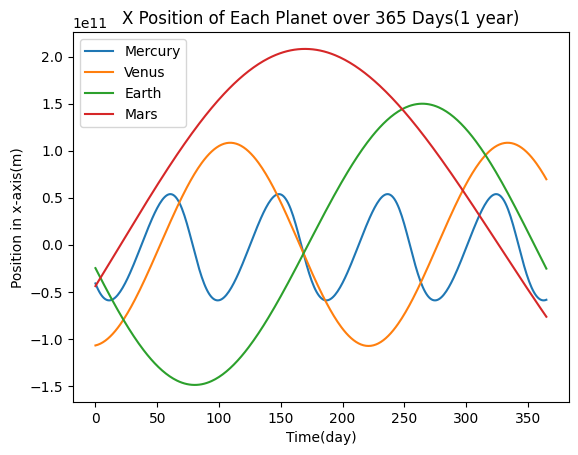

In [9]:
###################################################
#  Number of Days to Test
# Starting from Jan 1st 2024, run for 1 year
num_days = 365
###################################################

# Global Variables
t = 0                 # time
dt = 60               # change in time (60sec = 1min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
# 86400 = 1 day in seconds. Multiplied by num_days for next 365 days
while t <= 86400*num_days:
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos.x))
        venus_pos.append(copy.deepcopy(venus.pos.x))
        earth_pos.append(copy.deepcopy(earth.pos.x))
        mars_pos.append(copy.deepcopy(mars.pos.x))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

plt.plot(time_list, mercury_pos, label="Mercury")
plt.plot(time_list, venus_pos, label="Venus")
plt.plot(time_list, earth_pos, label="Earth")
plt.plot(time_list, mars_pos, label="Mars")
plt.title("X Position of Each Planet over 365 Days(1 year)")
plt.xlabel('Time(day)')
plt.ylabel('Position in x-axis(m)')
plt.legend()
plt.show()

***Plot Verification***:  
The above plot has been generated to see the changes in the x position of each planet over the course of 365 days (1 year).    
This plot then can be used to compare the solar year of each planet in terms of Earth days.  
- The year on Mercury is 88 Earth days. If you measure the number of days elapsed from one peak to another peak of Mercury, you can see that there's a ~88 days of difference which is expected.
- The year on Venus is 225 Earth days. If you measure the number of days elapsed from one peak to another peak of Venus, you can see that there's a ~225 days of difference which is expected.
- The year on Earth is 365 Earth days. You can clearly see that the Earth's position goes back to its original location at the end of end of the plot (after 365 days).
- The year on Mars is 687 Earth days. You can clearly see the huge curve that just cannot fit within the plot's 365 days time interval.

I think the plot clearly shows how accurate the solar system simulation is.

***Position Data Verification***:  
On top of the plot verification, you can also verify the accuracy of the simulation from the print statements of Section B. Solar System section. If you go to https://ssd.jpl.nasa.gov/horizons/app.html#/, look for any planets, set the coordinate center to the Sun, and create a vector table from January 1st, 2024 to January 31th, 2024, you should be able to get the data that looks exactly the same as what these print statements show. Therefore, the accuracy of the simulation can be verified using the vector table given by NASA.



## f. Compare Accuracy With Different Values

I decided to test dt at 30, 60, 90, and 120

**When dt=30:**

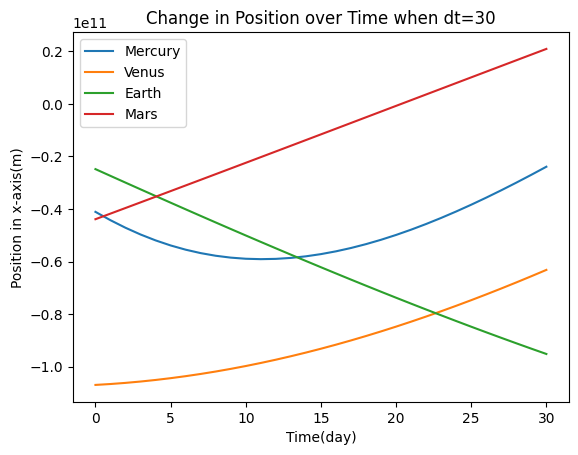

In [8]:
# Global Variables
t = 0                 # time
dt = 30               # change in time (90sec = 1.5min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
while t <= 86400*dt:
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos.x))
        venus_pos.append(copy.deepcopy(venus.pos.x))
        earth_pos.append(copy.deepcopy(earth.pos.x))
        mars_pos.append(copy.deepcopy(mars.pos.x))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

plt.plot(time_list, mercury_pos, label="Mercury")
plt.plot(time_list, venus_pos, label="Venus")
plt.plot(time_list, earth_pos, label="Earth")
plt.plot(time_list, mars_pos, label="Mars")
plt.title("Change in Position over Time when dt=30")
plt.xlabel('Time(day)')
plt.ylabel('Position in x-axis(m)')
plt.legend()
plt.show()

**When dt=60**:

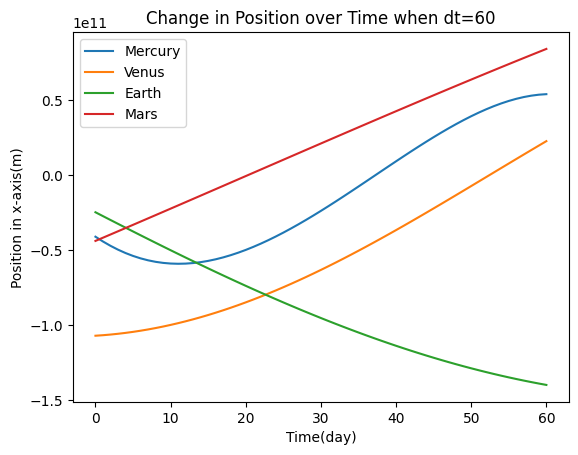

In [9]:
# Global Variables
t = 0                 # time
dt = 60               # change in time (90sec = 1.5min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
while t <= 86400*dt:
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos.x))
        venus_pos.append(copy.deepcopy(venus.pos.x))
        earth_pos.append(copy.deepcopy(earth.pos.x))
        mars_pos.append(copy.deepcopy(mars.pos.x))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

plt.plot(time_list, mercury_pos, label="Mercury")
plt.plot(time_list, venus_pos, label="Venus")
plt.plot(time_list, earth_pos, label="Earth")
plt.plot(time_list, mars_pos, label="Mars")
plt.title("Change in Position over Time when dt=60")
plt.xlabel('Time(day)')
plt.ylabel('Position in x-axis(m)')
plt.legend()
plt.show()

**When dt=90:**

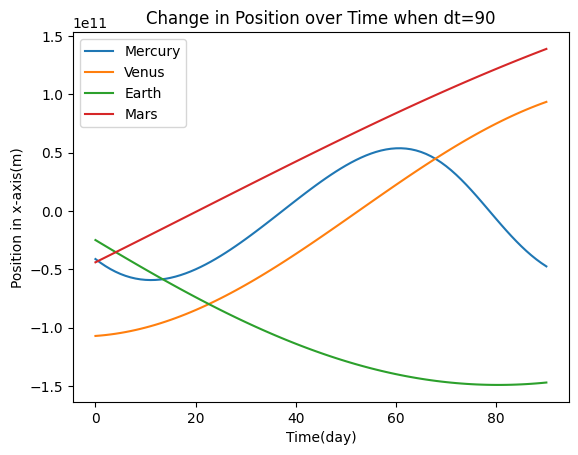

In [10]:
# Global Variables
t = 0                 # time
dt = 90               # change in time (90sec = 1.5min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
while t <= 86400*dt:
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos.x))
        venus_pos.append(copy.deepcopy(venus.pos.x))
        earth_pos.append(copy.deepcopy(earth.pos.x))
        mars_pos.append(copy.deepcopy(mars.pos.x))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

plt.plot(time_list, mercury_pos, label="Mercury")
plt.plot(time_list, venus_pos, label="Venus")
plt.plot(time_list, earth_pos, label="Earth")
plt.plot(time_list, mars_pos, label="Mars")
plt.title("Change in Position over Time when dt=90")
plt.xlabel('Time(day)')
plt.ylabel('Position in x-axis(m)')
plt.legend()
plt.show()

**When dt = 120 (120 seconds):**

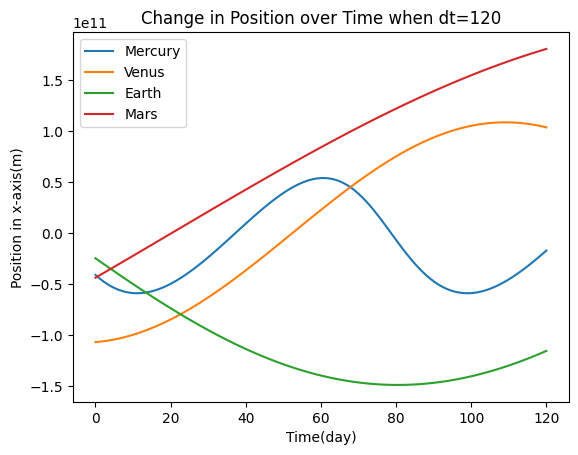

In [11]:
# Global Variables
t = 0                 # time
dt = 120               # change in time (90sec = 1.5min)

# VPython Planet Objects - position of each planet is an actual distance from the sun
sun = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg", 
             pos=vector(0,0,0), radius=r_sun*20, mass=m_sun, shiness=1, make_trail=True, emissive=True)
mercury = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/3/30/Mercury_in_color_-_Prockter07_centered.jpg", 
                 pos=vector(-4.108411877039495e10,2.997375954154480e10,6.217890408222714e9), radius=r_mercury*scale, mass=m_mercury, shiness=0, p=vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)*m_mercury, emissive=True)
venus = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/1/19/Cylindrical_Map_of_Venus.jpg", 
               pos=vector(-1.069987422398024e11,-1.145572515113905e10,6.016588327139664e9), radius=r_venus*scale, mass=m_venus, shiness=0, p=vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)*m_venus, emissive=True)
earth = sphere(texture=textures.earth, pos=vector(-2.481099325965390e10,1.449948612736719e11,-8.215203670851886e6), radius=r_earth*scale, mass=m_earth, shiness=0, p=vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)*m_earth, 
               force=vector(0,0,0), emissive=True)
mars = sphere(texture="https://upload.wikimedia.org/wikipedia/commons/0/02/OSIRIS_Mars_true_color.jpg", 
              pos=vector(-4.388577457378983e10,-2.170849264747524e11,-3.473007284583151e9), radius=r_mars*scale*1.5, mass=m_mars, shiness=0, p=vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)*m_mars, emissive=True)

# Give initial velocity to all planets
mercury.velocity = vector(-3.865743010383652e4,-3.733889075044869e4,4.944436024774976e2)
venus.velocity = vector(3.513460276994624e3, -3.497755629371660e4, -6.830913209445484e2)
earth.velocity = vector(-2.984146365518679e4,-5.126262286859617e3,1.184224839788195e0)
mars.velocity = vector(2.466191455128526e4, -2.722160161977370e3, -6.619819103693254e2)

# Add these planets to the list and later iterate
planets = []
planets.append(mercury)
planets.append(venus)
planets.append(earth)
planets.append(mars)

# List to store position of each planet
time_list = []
mercury_pos = []
venus_pos = []
earth_pos = []
mars_pos = []

day_cnt = 0

# SIMULATION
while t <= 86400*dt:
    
    # Print position everyday
    if round(t) % 86400 == 0:
        # append overwrites existing data, so deepcopy it
        time_list.append(copy.deepcopy(day_cnt))
        mercury_pos.append(copy.deepcopy(mercury.pos.x))
        venus_pos.append(copy.deepcopy(venus.pos.x))
        earth_pos.append(copy.deepcopy(earth.pos.x))
        mars_pos.append(copy.deepcopy(mars.pos.x))
        day_cnt += 1
    
    for planet1 in planets:
        # Attractive force between the planet and the sun
        planet1.force = gforce(planet1, sun)
    
        for planet2 in planets:
            if (planet1 != planet2):
                # Attractive force between the planet and the nearby planets
                planet1.force += gforce(planet1, planet2)
    
    # update momentum and position of all planets
    for planet in planets:
        planet.p += planet.force * dt
        planet.pos += planet.p / planet.mass * dt
        
    # update time
    t = t + dt

plt.plot(time_list, mercury_pos, label="Mercury")
plt.plot(time_list, venus_pos, label="Venus")
plt.plot(time_list, earth_pos, label="Earth")
plt.plot(time_list, mars_pos, label="Mars")
plt.title("Change in Position over Time when dt=120")
plt.xlabel('Time(day)')
plt.ylabel('Position in x-axis(m)')
plt.legend()
plt.show()

***Comment:***  
I've tested dt at 30, 60, 90, and 120. You can clearly see more plots getting added to the figure as more timestep gets added to the simulations.